
# Project: Investigate a Dataset - Sales dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is a Sales dataset from [kaggle](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data?embedded=True).,it's a dataset contains the information of an international company sales over three years.
I chose this dataset to make me a step closer to the bussiness Analysis.


### Question(s) for Analysis
<ul>    
<li>What is the overall trend in sales over time? Are sales increasing or decreasing, and at what rate?</li>
<li>What is the most month,quarter and year has best sells?</li>
<li>what is the ratio between the deals size?</li>
</ul>






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


<h1>So the first problem was that the encoder has a problem so after a search i was concluded to this<h1>
    

In [2]:
#df = pd.read_csv("sales_data.csv")

encodings_to_try = ['utf-8', 'latin1', 'ascii']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("sales_data.csv", encoding=encoding)
        break  # If the CSV was successfully read, we can stop trying encodings
    except UnicodeDecodeError:
        print(encoding)
        continue


utf-8


In [3]:
#this is used to show all the columns
pd.options.display.max_columns = None
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000



### Data Cleaning

In [6]:
print("this is the TERRITORY unique values: ",df['TERRITORY'].unique())
print("")
print("this is the ADDRESSLINE2 unique values: ",df['ADDRESSLINE2'].unique())

this is the TERRITORY unique values:  [nan 'EMEA' 'APAC' 'Japan']

this is the ADDRESSLINE2 unique values:  [nan 'Level 3' 'Suite 101' 'Level 6' 'Suite 750' 'Level 15' '2nd Floor'
 'Suite 400' 'Floor No. 4' 'Suite 200']


## I don't need 'ADDRESSLINE2' AND 'TERRITORY' according to the previous data

In [7]:
df = df.drop(columns=['TERRITORY','ADDRESSLINE2'])

## Now i will change the data type of the date column from "object" to "datetime64"

In [8]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

## we replace the NAN in the postal code with "0"

In [9]:
df['POSTALCODE'].fillna(0,inplace=True)
df['POSTALCODE'].isna().sum().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [10]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2004-05-11 00:16:49.989373056,2.717676,7.092455,2003.81509,100.715551
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2003-01-06 00:00:00,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2003-11-06 12:00:00,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,2004-06-15 00:00:00,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,2004-11-17 12:00:00,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,2005-05-31 00:00:00,4.000000,12.000000,2005.00000,214.000000
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,1.203878,3.656633,0.69967,40.187912


<a id='eda'></a>
## Exploratory Data Analysis


In [11]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,NY,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,NaN,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,CA,90003,USA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,San Francisco,CA,0,USA,Brown,Julie,Medium


# What is the overall trend in sales over time? Are sales increasing or decreasing, and at what rate?

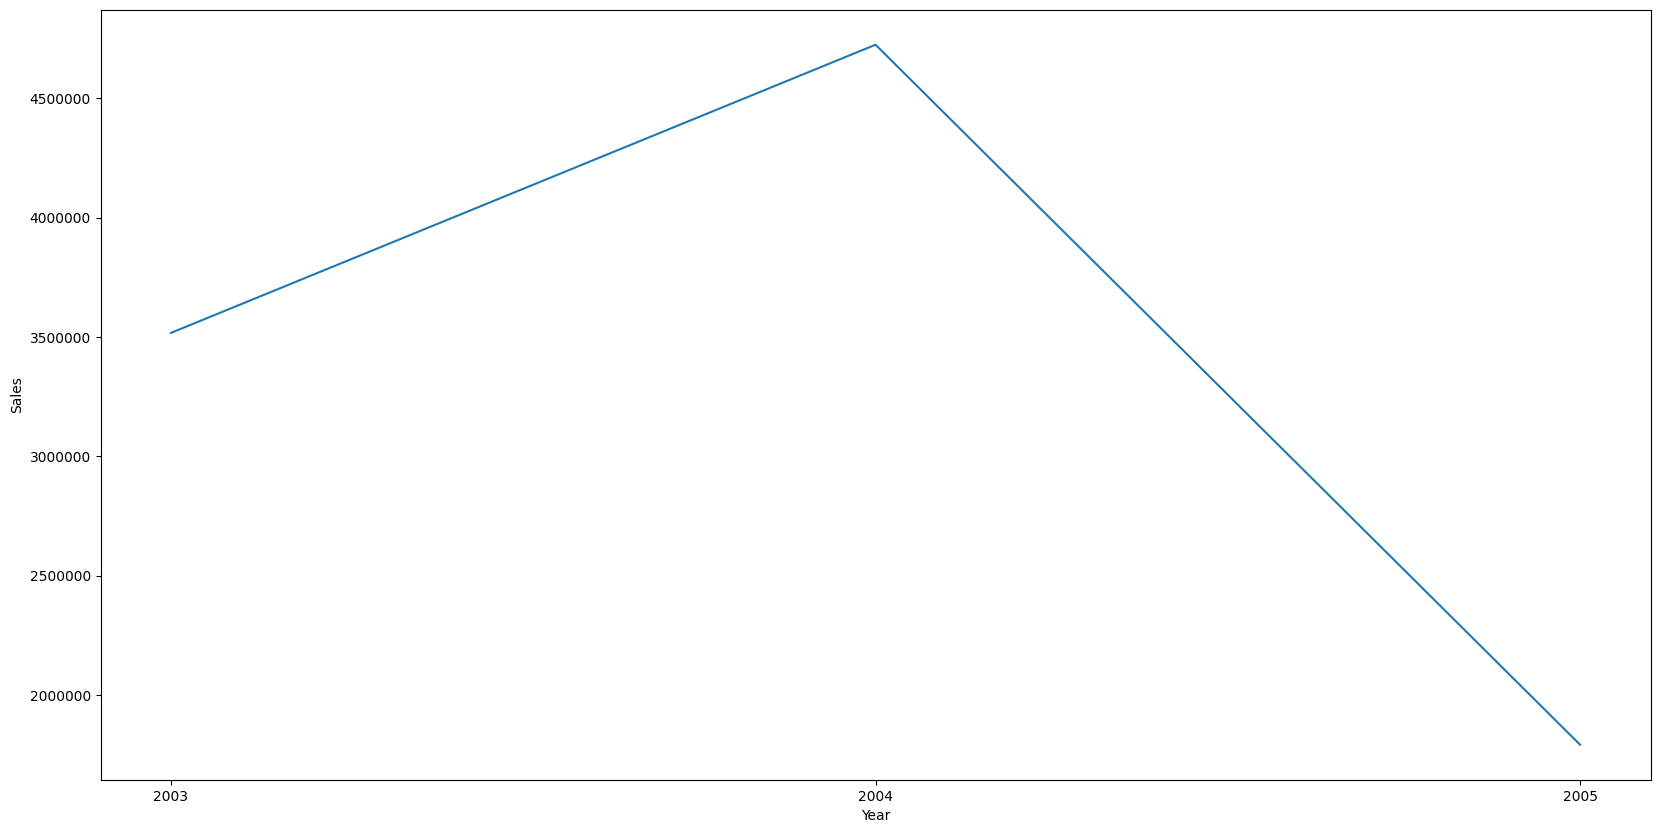

In [12]:

sales_by_year = df.groupby(df['ORDERDATE'].dt.year)['SALES'].sum()
plt.figure(figsize=(20, 10))
plt.plot(sales_by_year.index, sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(np.arange(min(sales_by_year.index), max(sales_by_year.index)+1, 1))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()


so this is the general trend over the years and "2004" has the best sellings.

# so this is another representation for the sales over the years

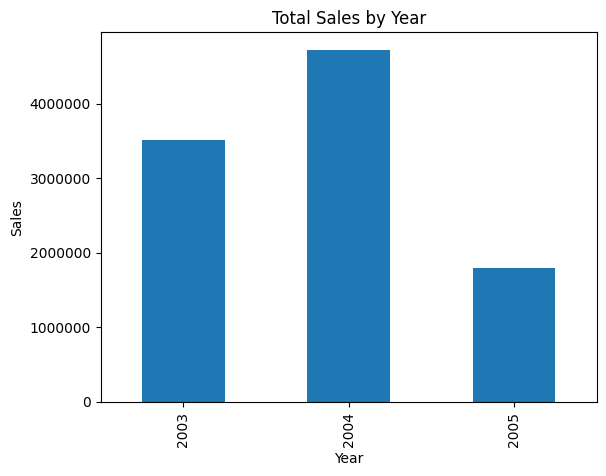

In [13]:
# group the data by year and sum the sales for each year
sales_by_year = df.groupby('YEAR_ID')['SALES'].sum()

# plot the sales data as bar chart
sales_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales by Year')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()


so like the first one "2004" is on the lead.

# What is the most month,quarter and year has best sells?

### let's start with the quarter


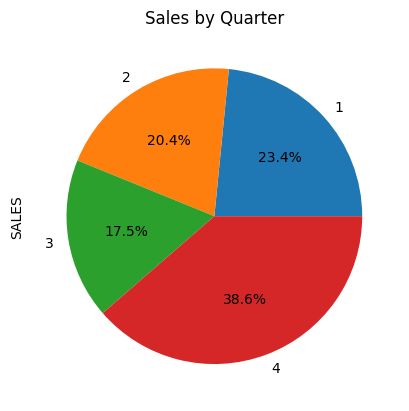

In [14]:
sales_by_quarter=df.groupby('QTR_ID')['SALES'].sum()
sales_by_quarter.plot(kind='pie',autopct='%1.1f%%')
plt.title('Sales by Quarter')
plt.show()

the fourth quarter is the most selling one


## now the month

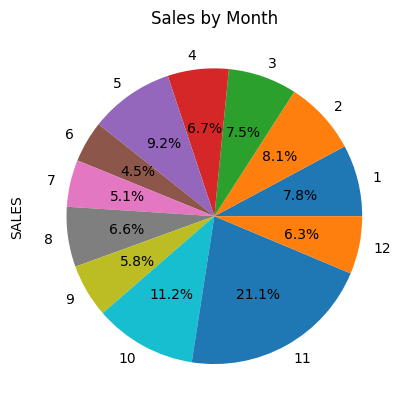

In [15]:
sales_by_month = df.groupby('MONTH_ID')['SALES'].sum()

#create the pie chart
sales_by_month.plot(kind='pie',autopct='%1.1f%%')
plt.title('Sales by Month')

plt.show()


### i will make it bar chart to make it easier to detect

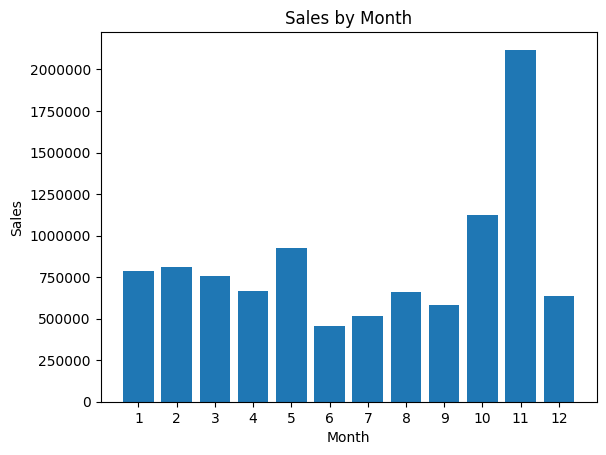

In [16]:
plt.bar(sales_by_month.index, sales_by_month.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.xticks(np.arange(min(sales_by_month.index), max(sales_by_month.index)+1, 1))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()

so "november" is the most selling items

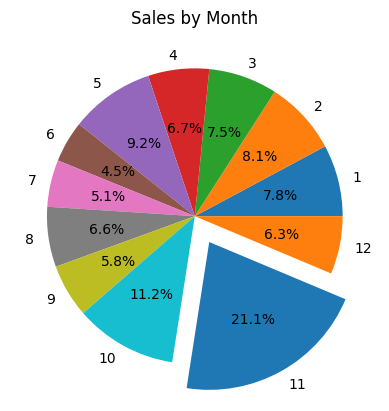

In [17]:
sales_by_month = df.groupby('MONTH_ID')['SALES'].sum()

# find the maximum part of the pie chart
max_part = sales_by_month.idxmax()

# create the explode list 
explode = [0] * len(sales_by_month)
explode[sales_by_month.index.get_loc(max_part)] = 0.2

# create the pie chart
plt.pie(sales_by_month, labels=sales_by_month.index,explode=explode,autopct='%1.1f%%')

plt.title('Sales by Month')
plt.show()

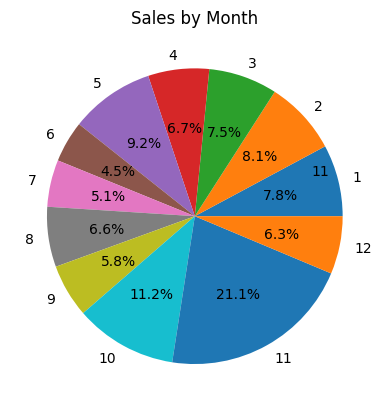

In [18]:
# group the data by month and sum the sales for each month
sales_by_month = df.groupby('MONTH_ID')['SALES'].sum()

# create the pie chart
plt.pie(sales_by_month, labels=sales_by_month.index,autopct='%1.1f%%')

# find the maximum part of the pie chart
max_part = sales_by_month.idxmax()

# Plot the text label on the maximum part of the pie chart
plt.gca().annotate(f'{max_part}', xy=(0.5, 0.5), xytext=(0.5, 0.5),
             textcoords='figure fraction', ha='center', va='center')

plt.title('Sales by Month')
plt.show()



# Here, i will make some exploration to know why there is this gap between the november month and the rest of the months

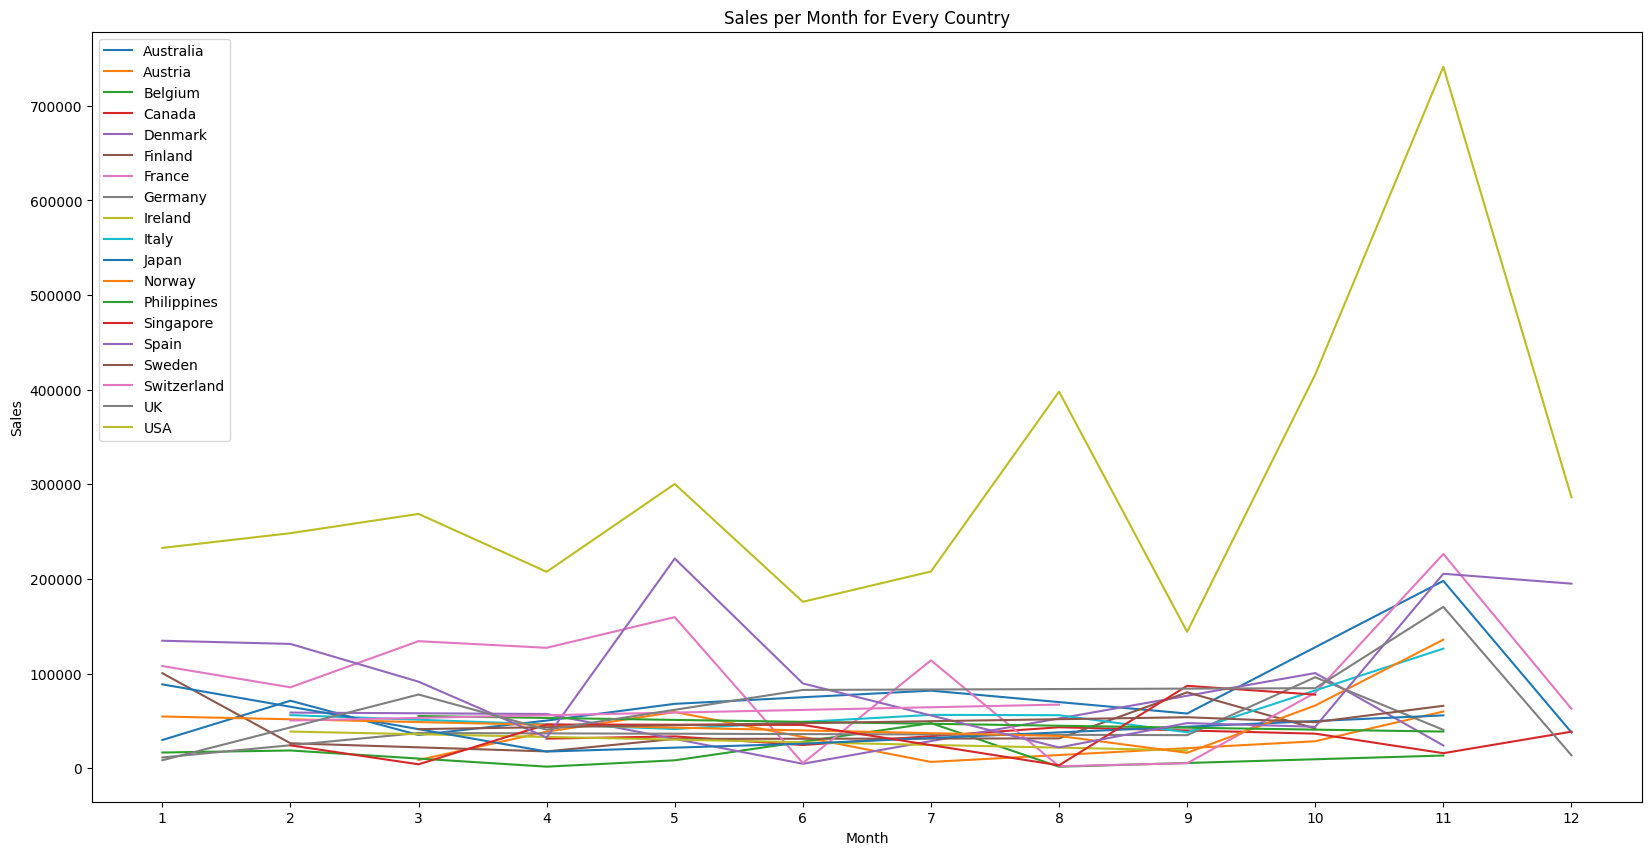

In [19]:
# Group data by country and month, and sum the sales
sales_by_month_country = df.groupby(['COUNTRY', 'MONTH_ID'])['SALES'].sum()

# Reset the index to prepare the data for plotting
sales_by_month_country = sales_by_month_country.reset_index()

# Create a line chart
plt.figure(figsize=(20,10))
for country, data in sales_by_month_country.groupby('COUNTRY'):
    plt.plot(data['MONTH_ID'], data['SALES'], label=country)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per Month for Every Country')
plt.xticks(np.arange(min(sales_by_month.index), max(sales_by_month.index)+1, 1))

plt.legend()
plt.show()

## Now, i know for sure that "USA" is the reason for the best sales in the novemeber month, and in general it's number one for sales

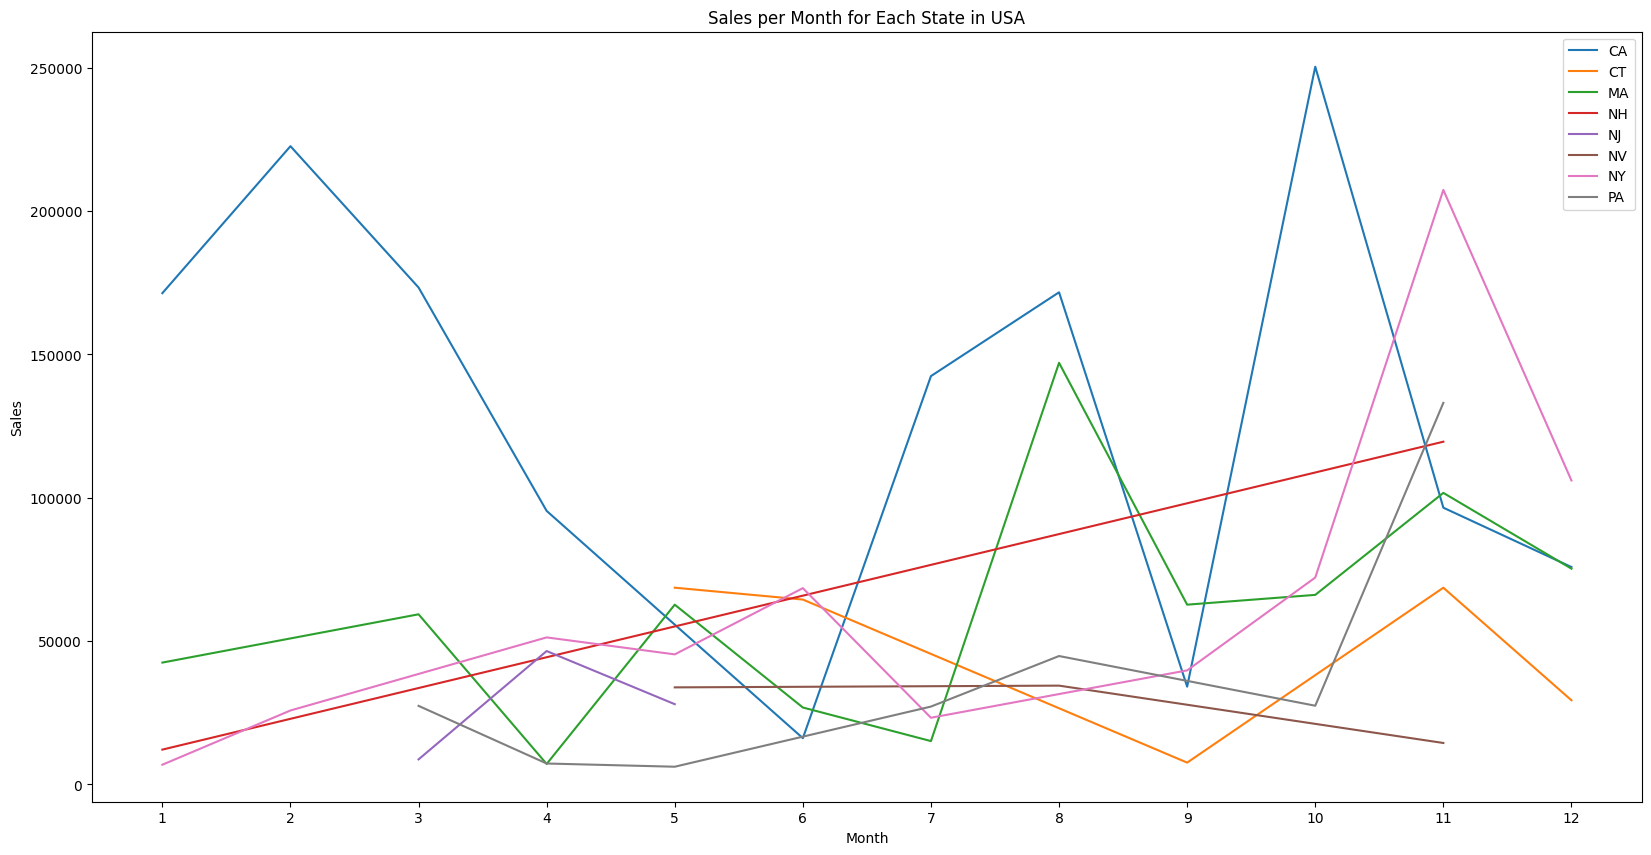

In [20]:
# Filter data for USA
df_usa = df[df['COUNTRY'] == 'USA']

# Group data by state and month, and sum the sales
sales_by_month_state = df_usa.groupby(['STATE', 'MONTH_ID'])['SALES'].sum()

# Reset the index to prepare the data for plotting
sales_by_month_state = sales_by_month_state.reset_index()

# Create a line chart
plt.figure(figsize=(20,10))
for state, data in sales_by_month_state.groupby('STATE'):
    plt.plot(data['MONTH_ID'], data['SALES'], label=state)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per Month for Each State in USA')
plt.xticks(np.arange(min(sales_by_month.index),max(sales_by_month.index)+1,1))
plt.legend()
plt.show()



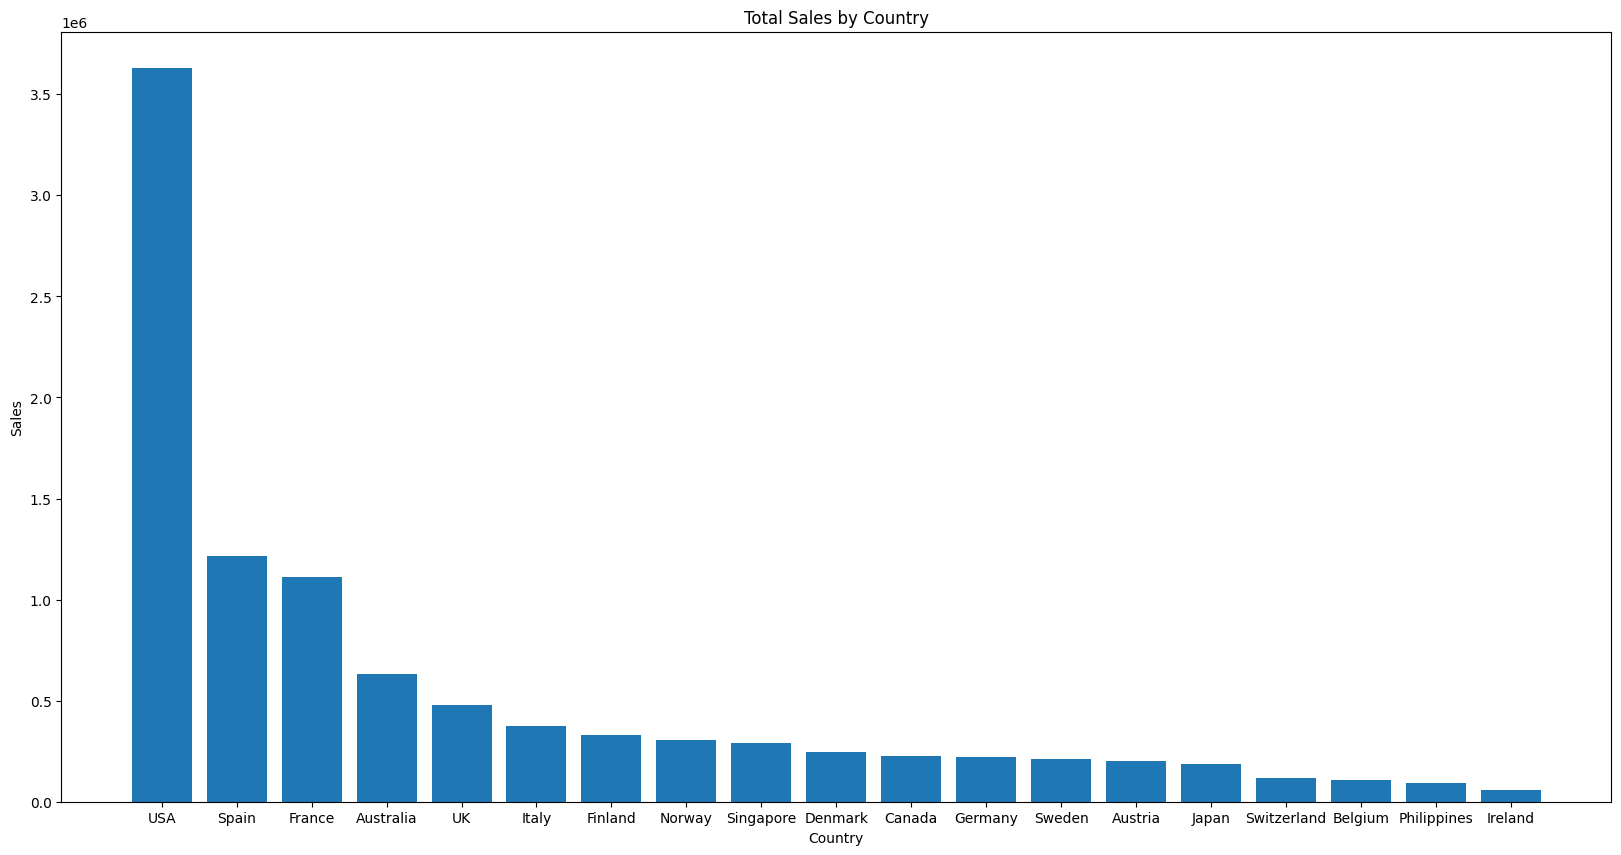

In [21]:
# Group data by country and sum the sales
sales_by_country = df.groupby('COUNTRY')['SALES'].sum()

# Sort the data in descending order
sales_by_country = sales_by_country.sort_values(ascending=False)

# Plot the data in a bar chart
plt.figure(figsize=(20,10))
plt.bar(sales_by_country.index, sales_by_country.values)
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Total Sales by Country')
plt.show()


## To make it more clear, i used the bar chart to show the countries 

# what is the ratio between the deals size?

what is the ratio between the deals size?

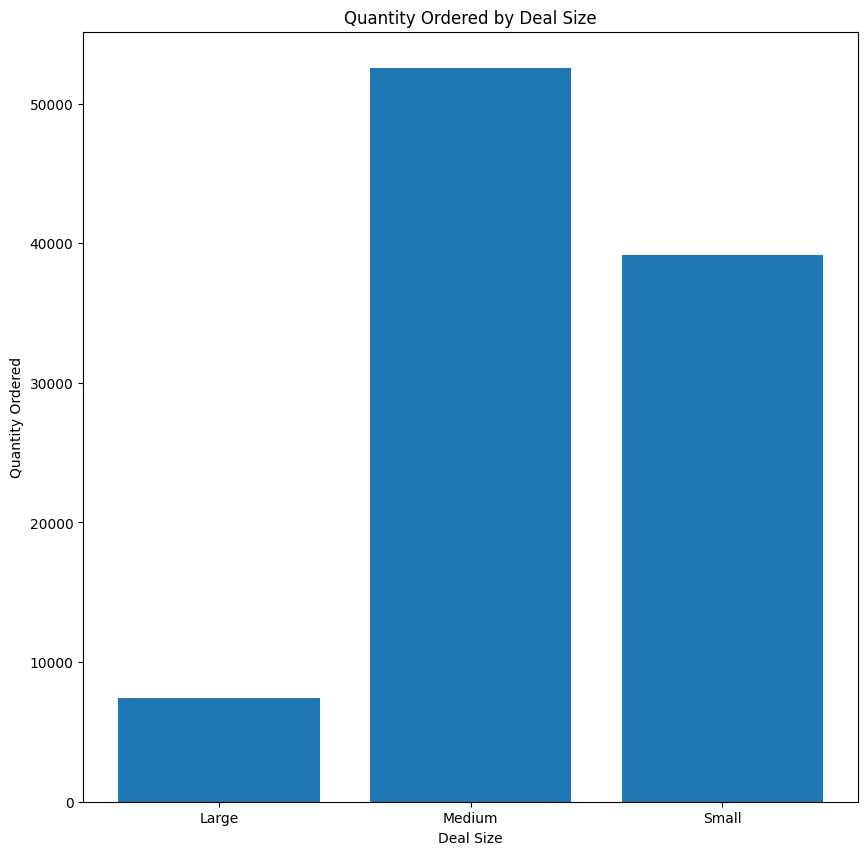

In [22]:
# Group data by deal size and sum the quantity ordered
quantity_by_dealsize = df.groupby('DEALSIZE')['QUANTITYORDERED'].sum()

# Plot the data in a column chart
plt.figure(figsize=(10,10))
plt.bar(quantity_by_dealsize.index, quantity_by_dealsize.values)
plt.xlabel('Deal Size')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Deal Size')
plt.show()

### so the medium deals has the most demand

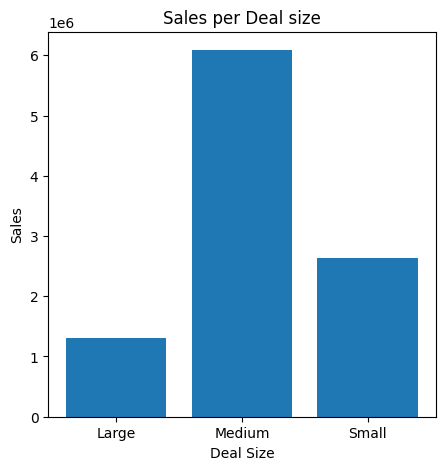

In [23]:
price_by_dealsize = df.groupby('DEALSIZE')['SALES'].sum()
plt.figure(figsize=(5,5))
plt.ylabel("Sales")
plt.bar(price_by_dealsize.index,price_by_dealsize.values)


plt.title("Sales per Deal size")
plt.xlabel('Deal Size')
plt.show()


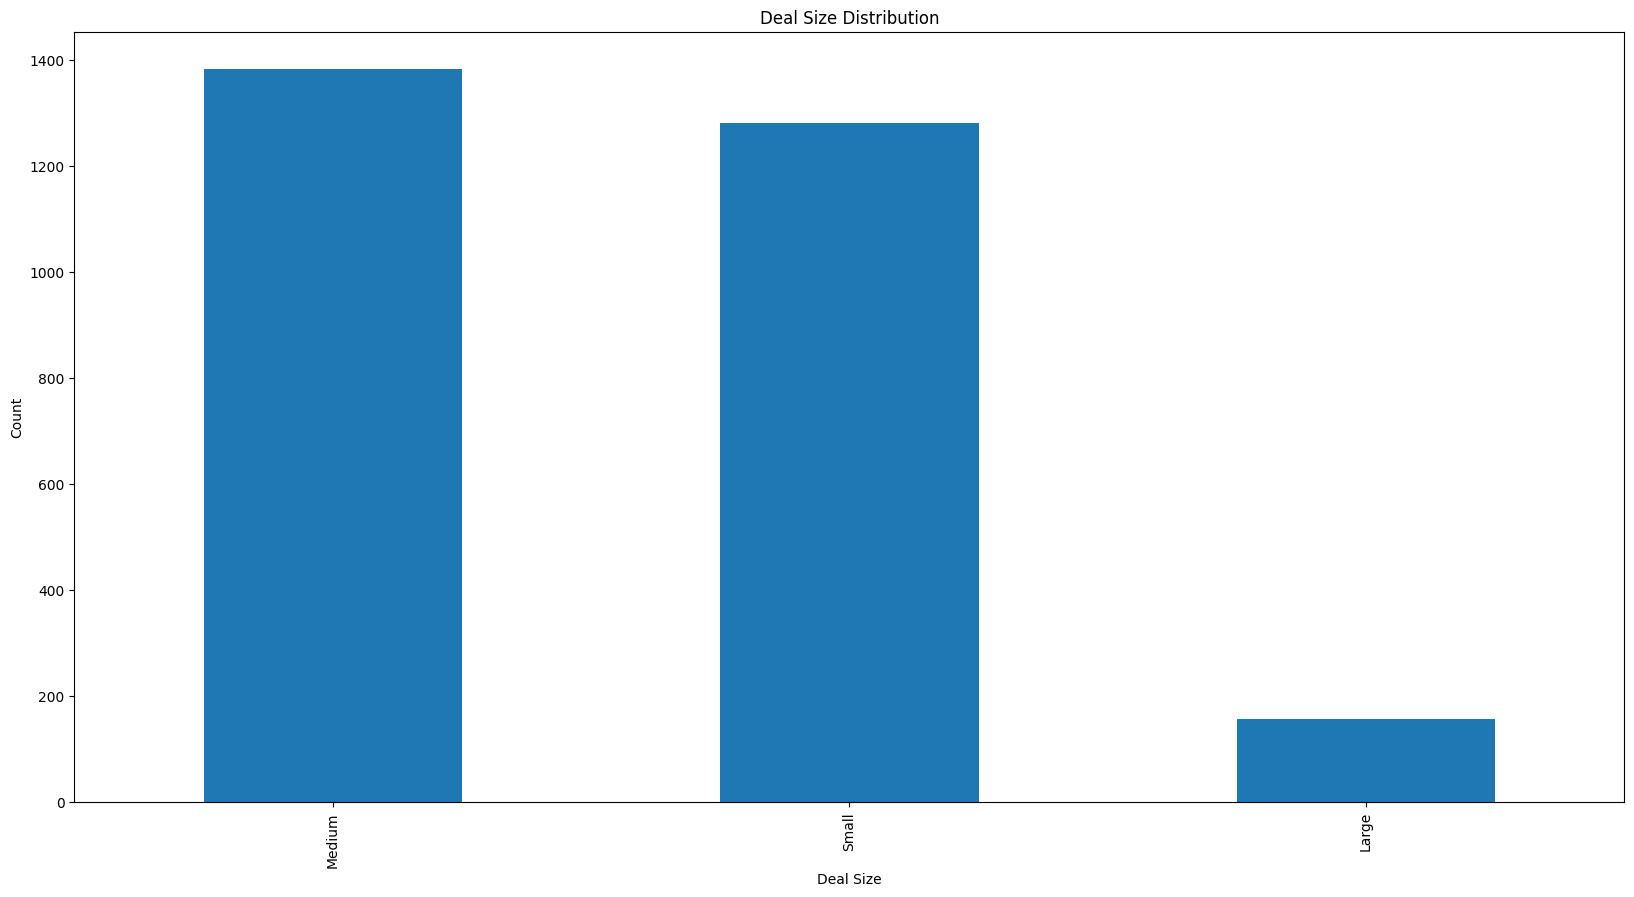

In [24]:
# Count the number of occurrences of each deal size
deal_size_counts = df['DEALSIZE'].value_counts()

# Plot the distribution of deal sizes
plt.figure(figsize=(20,10))
deal_size_counts.plot(kind='bar')
plt.xlabel('Deal Size')
plt.ylabel('Count')
plt.title('Deal Size Distribution')
plt.show()

#### How does the deal size relate to the contact name (first name and last name)?

IF you double click it will be zoomed


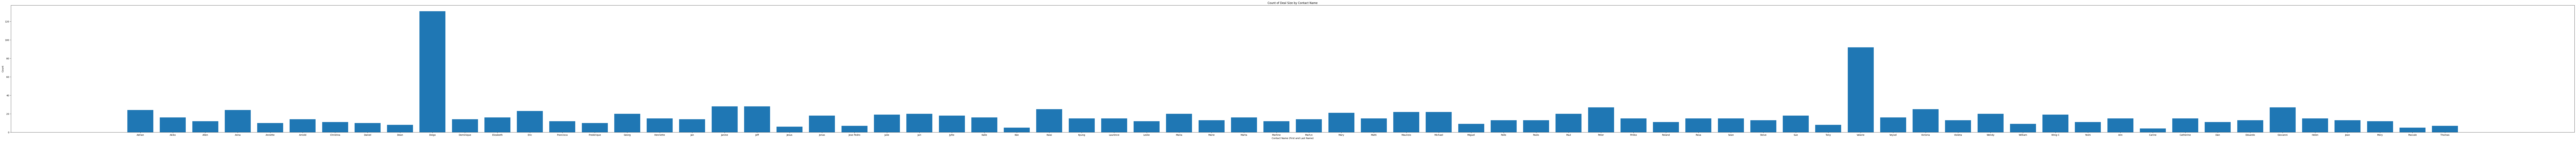

In [25]:
# group data by deal size, contact first name and contact last name and count the number of occurrences
dealsize_by_name = df.groupby(['DEALSIZE','CONTACTFIRSTNAME','CONTACTLASTNAME']).size().reset_index(name='counts')
print("IF you double click it will be zoomed")
# create a bar chart
plt.figure(figsize=(200,10))
plt.bar(dealsize_by_name.CONTACTFIRSTNAME, dealsize_by_name.counts)
plt.xlabel('Contact Name (First and Last Name)')
plt.ylabel('Count')
plt.title('Count of Deal Size by Contact Name')
plt.show()



## Diego and Valarie are the best customers

                                    _____________________________________

### so now we are sure that the "Medium" deal size has the most demand, has the most quantity ordered and the most sales 


### Diego and Valarie is the best customers


the most used transportation for sales

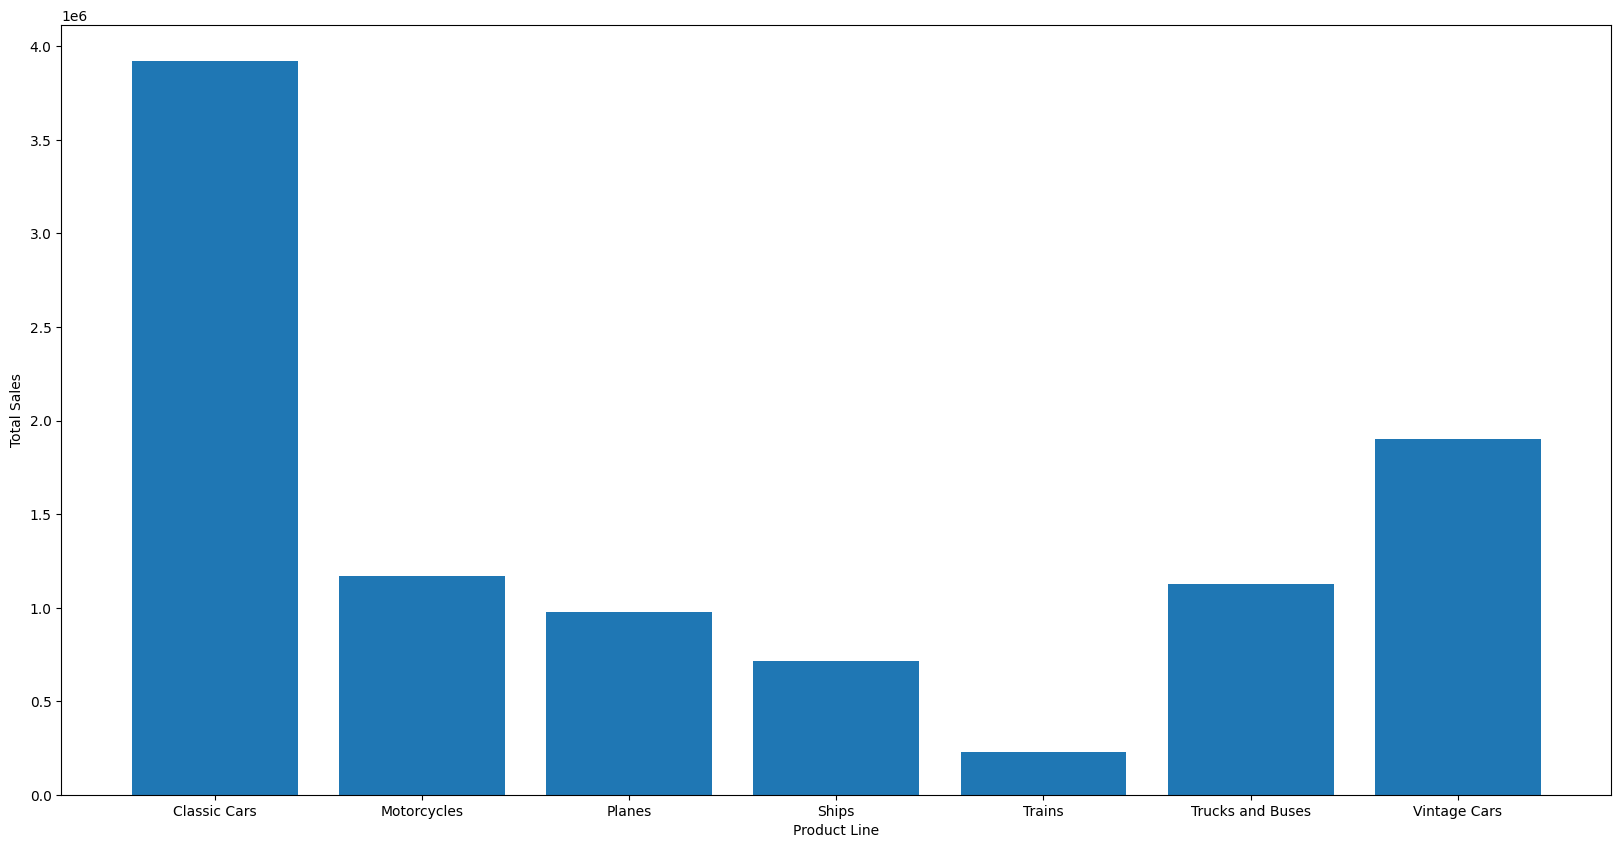

In [26]:
product_line_sales = df.groupby('PRODUCTLINE')['SALES'].sum()

# create a bar chart of the product line sales
plt.figure(figsize=(20,10))
plt.bar(product_line_sales.index, product_line_sales.values)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()


so the cars in general is the most used

<a id='conclusions'></a>
# Conclusions




#    

I had three questions before i dive into the data:

What is the overall trend in sales over time? Are sales increasing or decreasing, and at what rate?
What is the most month,quarter and year has best sells?
what is the ratio between the deals size



and through the journey i discovered more 
#### First:
        the sales increased from 2003 till 2004 and then decreased 2005 , there are limitations here because i could't detect why the sales decreased on 2005
        the sales increased the most at the last Quarter of the year, espicially at November month.
        the main reason for the increasing sales at the last Quarter is the USA and there was two limitations 
        here:
###        limitations
            First: because i couldn't detect why the increase or why the decrease over the dataset
            Second: the "STATE" column has some values that don't exist and this lead to some blurry vision on 
            which state cause the increase on the November month
            
        



The most consuming countries is: 'USA','Spain,'France','Australlia','UK'
    
    'USA' is at the top with about one billion dollar 
    
    

second:

        the Deal sizes are three: small, medium and large
        the medium is the one that has the most sales, quantity ordered and in geneeral the most ordered one is
        the medium
 ####      Limitations:
        there are some limitations about this, the kind of the company products is unknown and that leads to 
        some confusion because it's hard to know which kinds of products are the most consumed and what products 
        the customers ask for.
        
        

## Advice:

i have some advice to the company based on the data i analysed
        1- Paying attention to develop and expand of the land transport network as it's the most used to deliver
            the order
        2- Strengthening US relations and make special offers as it's the most consumed
        






# And that is the conclusion
